- Use the diabetes database.
- Plot the histograms of the variables. Visualize the difference in distribution between
diabetics and non-diabetics with separate plots using Seaborn. Create a subplot of 3 X
3 and plot a density plot for each variable. Hide the 9th subplot.
- Check the data (null data and number of rows with 0 for each variable). Replace the
zero values with NaN. Re-check the data.
Replace the NaN values with the mean of the non-missing values.
- Standardize the data. Take a look at the mean, std. deviation, and the maximum of
each of the transformed variables.
- Create a train and test set (80/20).
- Use the sequential class from Keras to build the MLP. Add two hidden layers (with the
respective node values of 32 and 16, ‘relu’ activation) and one hidden layer (‘sigmoid’
activation for output layer). Use ‘adam’ optimizer and ‘binary crossentropy’ loss. What
does cross-entropy mean and refer to?
- What is the outcome of 100 and 200 epochs? Any difference? Explain.
- Evaluate the training and testing sets’ accuracy.
- Provide the confusion matrix using Seaborn. What are your conclusions?
- Provide the ROC graph. What is the area under the curve? What are your
conclusions?
- Is the MLP better than a logistic regression model? Do you get a better accuracy with
a Random Forest model? Why? Show the outcomes of the different models in a table
format.

In [1]:
# Use the diabetes database.
# Plot the histograms of the variables. Visualize the difference in distribution between
# diabetics and non-diabetics with separate plots using Seaborn. Create a subplot of 3 X
# 3 and plot a density plot for each variable. Hide the 9th subplot.

import pandas as pd
df = pd.read_csv("/content/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f13e24f9b90>,
      dtype=object)

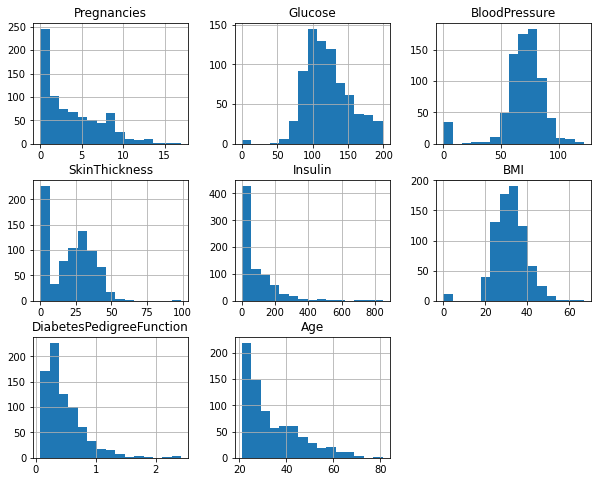

In [4]:
X.hist(figsize=(10,8), bins=15)

In [5]:
# Check the data (null data and number of rows with 0 for each 
# variable). Replace the zero values with NaN. Re-check the data.
# Replace the NaN values with the mean of the non-missing values.
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
17           163      72             41             114      40.9  0.817                     47   1          1
15           136      70             32             110      37.1  0.153                     43   1          1
2            87       58             16             52       32.7  0.166                     25   0          1
                      0              23             0        28.9  0.773                     25   0          1
             85       65             0              0        39.6  0.930                     27   0          1
                                                                                                            ..
5            106      82             30             0        39.5  0.286                     38   0          1
             105      72             29             325      36.9  0.159                     28   0          1
      

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
 X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]


In [8]:
import numpy as np
X[df==0] = np.nan
X


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47


In [9]:
X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].fillna(value=X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].mean())
X


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [10]:
#Standardize the data. Take a look at the mean, std. deviation, and 
# the maximum of each of the transformed variables.
X.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,2.975395,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.494673,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
# - Create a train and test set (80/20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# - Use the sequential class from Keras to build the MLP. Add two hidden layers (with the
# respective node values of 32 and 16, ‘relu’ activation) and one hidden layer (‘sigmoid’
# activation for output layer). Use ‘adam’ optimizer and ‘binary crossentropy’ loss. What
# does cross-entropy mean and refer to?

from keras.models import Sequential
model = Sequential()

In [14]:
from keras.layers import Dense

In [15]:
# add first hidden layer
model.add(Dense(32,activation='relu',input_dim=8))

In [16]:
# add second hidden layer 
model.add(Dense(16, activation='relu'))

In [17]:
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# What does cross entropy mean?
Cross Entropy is the use of negative logs on probabilities where a high number means bad models and a low number mean a good model.

In [20]:
# - What is the outcome of 100 and 200 epochs? 
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 2.8784 - accuracy: 0.4544
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0226 - accuracy: 0.5863
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7907 - accuracy: 0.6107
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7162 - accuracy: 0.6417
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.6596
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6726
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6629
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7534 - accuracy: 0.6694
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6612
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7134
Epoch 11/

In [21]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7655
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4906 - accuracy: 0.7590
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7736
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4636 - accuracy: 0.7818
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5275 - accuracy: 0.7557
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7818
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7785
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7590
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7736
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7655
Epoch 11/

### Any difference? Explain.<br>
The Epoch 200 1/200 has high loss 5.3161 low accuracy .5863. Eventually drop when 200/200 losst .4734 accuracy .7476
The Epcok 100 1/100 loss .4715 accuracy .7573. 100/100 loss .4536 accuracy .7850.<br> 
the accuracy scores improves as the  evaluation increases(fraction gets bigger). The 200 epoch began with big loss and lower accuracy than the 100 epoch.

In [22]:
# - Evaluate the training and testing sets’ accuracy
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7801
Training Accuracy: 78.01%

5/5 [==============================] - 0s 2ms/step - loss: 0.7134 - accuracy: 0.7078
Testing Accuracy: 70.78%



In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)
y_pred_log = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log)

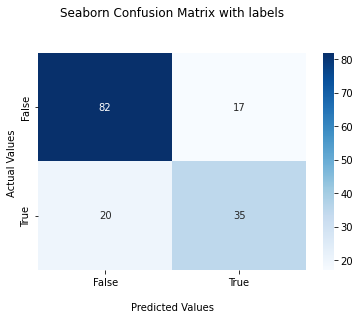

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
# - Is the MLP better than a logistic regression model? Do you get a better accuracy with
# a Random Forest model? Why? Show the outcomes of the different models in a table
# format.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [27]:
log_accuracy = accuracy_score(y_test, y_pred_log)

### Is the MLP better than a logistic regression model?<br>
No, the MLP doesn't have a better model than logistic regression<br>

### Do you get a better accuracy with a Random Forest model?<br>
No, the MLP model is not any better than logistic nor Random Forest<br>

### Why? Show the outcomes of the different models in a table format.<br>
The random forest's score is almost the same but the neural network is slightly lower in accuracy

In [28]:
acc_scores = pd.DataFrame({"Random Forest ": [rf_accuracy], "Logistic Regression ": [log_accuracy], "Neural Network ": [scores[1]]})  
acc_scores

,Random Forest,Logistic Regression,Neural Network
0,0.766234,0.75974,0.707792
